Lending Club Case Study:
Analysis includes following steps

1. Understand the data
2. Figure out redudant and invalid columns
3. Clean data which means delete columns which are required.
4. Impute data where ever its required
5. Analyse the each colums with univariant analysis
6. Bivariant and multi variant analysis
7. Recomendations to lending club 


In [240]:
#Import necessary libraries
import pandas as pd
import numpy as py
import numpy as num

import matplotlib.pyplot as plt
import seaborn as sns 

In [241]:
#Loading data set file in to data frame.
loan_info = pd.read_csv("C:/Users/pindiba/Downloads/loan/loan.csv", low_memory=False)
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [242]:
#Check shape of data frame
loan_info.shape

(39717, 111)

In [243]:
#Lower rows of data frame
loan_info.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
#There are so many missing value columns check percentage of missing values
null_val_perc = round(100*(loan_info.isnull().sum()/len(loan_info.index)), 2)
null_val_perc[ null_val_perc > 0 ]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [245]:
#drop columns if its contains more than 30 percentage of null values
loan_info.drop(null_val_perc[ null_val_perc > 30 ].index, axis=1, inplace=True)
loan_info.shape

(39717, 53)

In [246]:
#Finding number of unique values, printing high unique valued columns
loan_info.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [247]:
#Remove all uniue value columns from the data frame since these wont add any value to analysis
#Also remove emp_title', 'title', 'url' these columns have text values which are more unique values.
#lets remove ID and Member ID, zip and addr_state these are not going to provide any infomation applicant
loan_info.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)
loan_info.drop(['emp_title', 'title', 'url', 'member_id', 'id', 'zip_code'], axis=1, inplace=True)
loan_info.shape

(39717, 38)

In [248]:
null_perc = round(100*(loan_info.isnull().sum()/len(loan_info.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [249]:
#Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off.
#So, we will remove the rows with Current values in loan status.
#Removing current loan status rows
loan_info = loan_info[loan_info.loan_status != 'Current']
loan_info.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [250]:
# Remove all customer behaviour variables or columns, these are not available at the time of loan application
# so, these are not going to be used as predictors for credit approvals
loan_info.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'], axis=1, inplace=True)
loan_info.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20


In [251]:
#Check Missing values for each column
(loan_info.isna().sum()  /len(loan_info.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

In [252]:
# As we see 2.67% of missing values in emp_length column lets analyze it
print("Mode of emp_length : " + loan_info.emp_length.mode()[0])
loan_info.emp_length.value_counts()


Mode of emp_length : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [253]:
# let Impute mode value in place of missing values in emp_length since it has higher frequency any other values
loan_info.emp_length.fillna(loan_info.emp_length.mode()[0], inplace = True)
loan_info.emp_length.isna().sum()

0

In [254]:
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

In [255]:
#loan_info.term.unique()
#loan_info['term'] = data.term.str.strip()
#loan_info.term.unique()
# let standize values of each column

In [256]:
#column int_rate is in object form convert it into numeric 
loan_info['int_rate'] = loan_info.int_rate.str.strip('%').astype(float)

#loan issue date conversion
loan_info['issue_d'] = pd.to_datetime(loan_info.issue_d, format='%b-%y')
loan_info['issue_d'] = loan_info['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan_info['issue_d_year'] = loan_info.issue_d.dt.year
loan_info['issue_d_month'] = loan_info.issue_d.dt.strftime('%b')
loan_info['issue_d_weekday'] = loan_info.issue_d.dt.weekday

#data type conversion of year and weekday
loan_info['issue_d_year'] = loan_info['issue_d_year'].astype(object)
loan_info['issue_d_weekday'] = loan_info['issue_d_weekday'].astype(object)

#column emp_length is in object form convert it into numeric, such that we can get round of employee experiences 
loan_info.emp_length = pd.to_numeric(loan_info.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
                       
loan_info.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_d_year,issue_d_month,issue_d_weekday
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,2011,Dec,3
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,2011,Dec,3
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2011,Dec,3
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,2011,Dec,3
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,2011,Dec,3


# Univarant Analysis

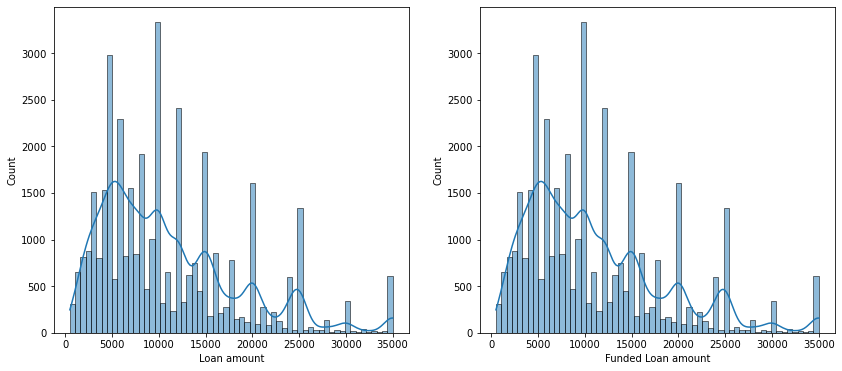

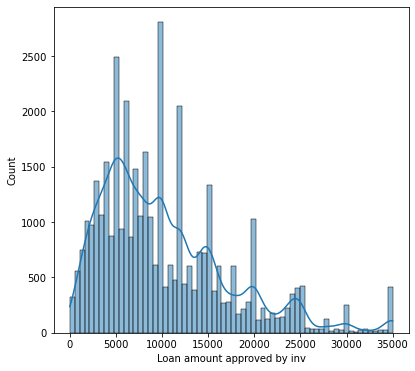

In [257]:
## Lets analyze the distribution of loan amount, funded amount and investor amount

plt.figure(figsize=(14,6))
#Setting subplot index
plt.subplot(1,2,1)
temp_var = pd.Series(loan_info.loan_amnt, name = "Loan amount")
sns.histplot(temp_var, kde = True)

plt.subplot(1,2,2)
temp_var = pd.Series(loan_info.loan_amnt, name = "Funded Loan amount")
sns.histplot(temp_var, kde = True)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
temp_var = pd.Series(loan_info.funded_amnt_inv, name = "Loan amount approved by inv")
sns.histplot(temp_var, kde = True)

plt.show()

Observations: Loan Amount applied, funded amount and Funded amount investment has the almost same distribution which means that most of the borrowers got apporved for applied loans amounts

<AxesSubplot:xlabel='Interest rates', ylabel='Count'>

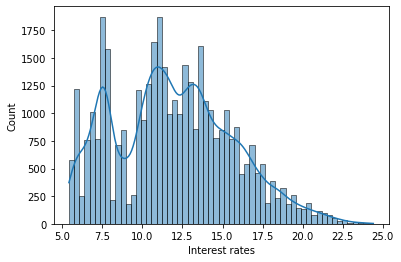

In [258]:
# lets analyze the distribution of interest rates given
temp_var = pd.Series(loan_info.int_rate, name = "Interest rates")
sns.histplot(temp_var, kde = True)

Observations: Most of the loans taken for interest rate of 7.5% to 17.5%

<AxesSubplot:xlabel='Employee experience', ylabel='Count'>

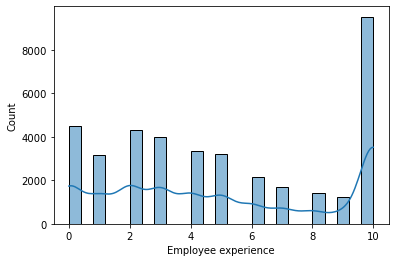

In [259]:
temp_var = pd.Series(loan_info.emp_length, name = "Employee experience")
sns.histplot(temp_var, kde = True)

<AxesSubplot:xlabel='Employee annual income', ylabel='Count'>

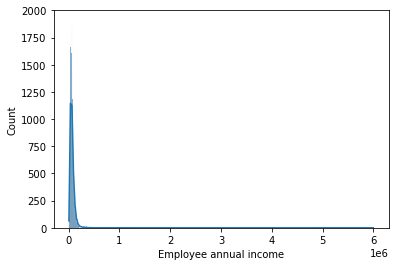

In [260]:
temp_var = pd.Series(loan_info.annual_inc, name = "Employee annual income")
sns.histplot(temp_var, kde = True)

<AxesSubplot:ylabel='Count'>

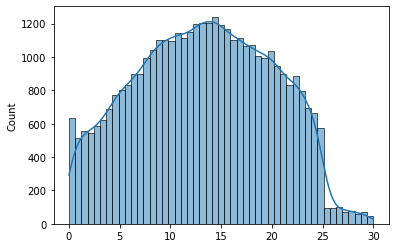

In [261]:
temp_var = pd.Series(loan_info.dti, name = "")
sns.histplot(temp_var, kde = True)

#Observations:
Looks like there are no outliers and the distribution is very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

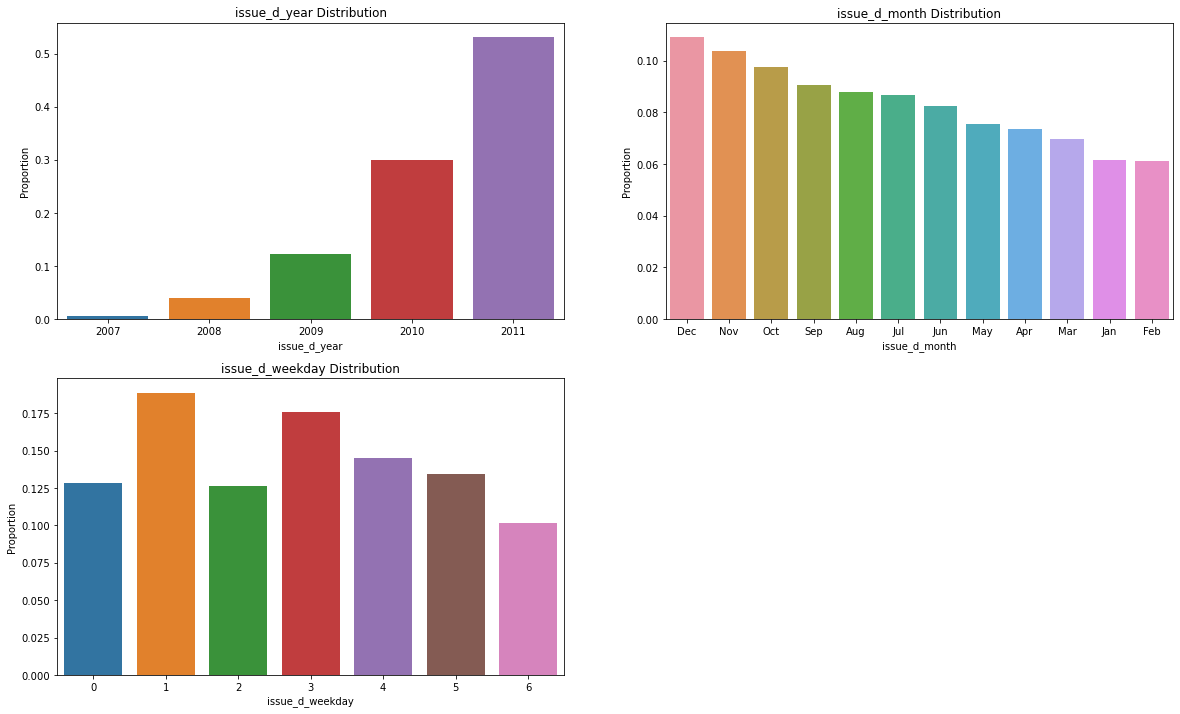

In [262]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = loan_info[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = loan_info[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = loan_info[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

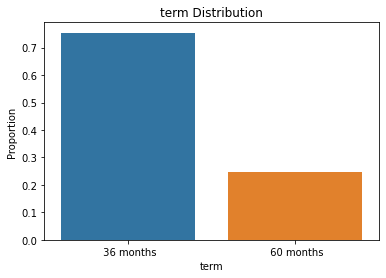

In [263]:
var = 'term'
#Probability / Percentage of each values
prob_df = loan_info[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Above plot clearly say that more loans sanctioned for term of 36 months

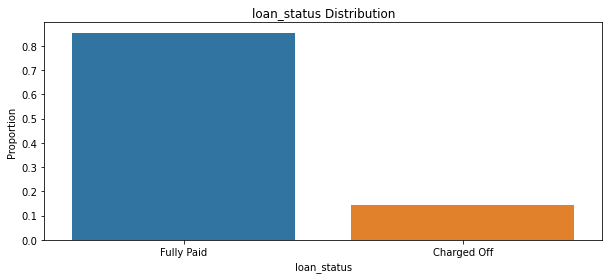

In [264]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan_info[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

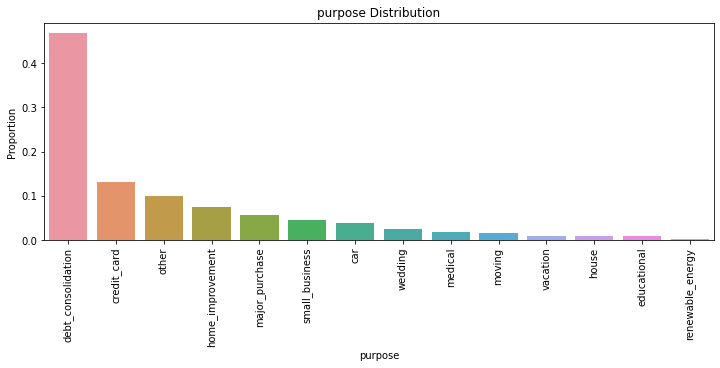

In [265]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = loan_info[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observation: more loans taken as purpose of debt consolidation

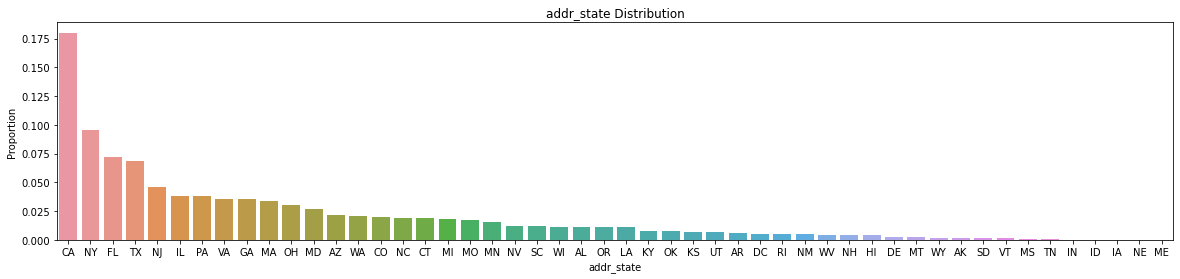

In [266]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = loan_info[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observation: People under state CA are taken more loans

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

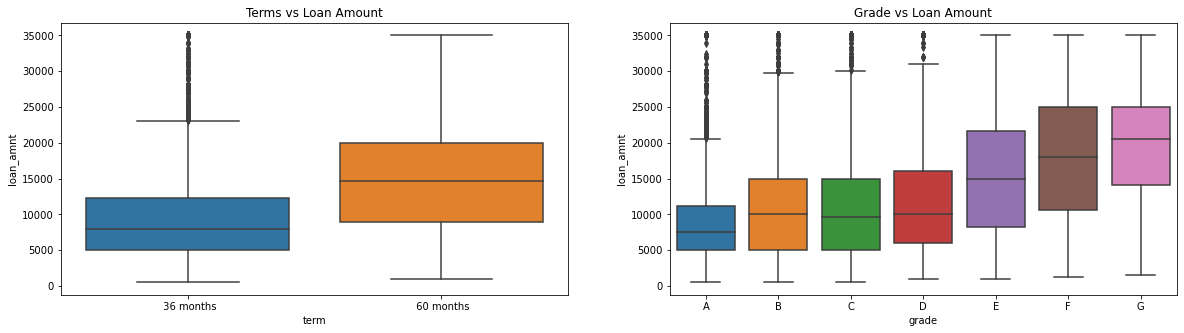

In [267]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_info.loan_amnt, data=loan_info)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_info.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_info.loan_amnt, order = grade_ord, data=loan_info)

Above graphs clearly shows that large amounts given to 60 months terms, similarly large amounts given to low grades

<AxesSubplot:title={'center':'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

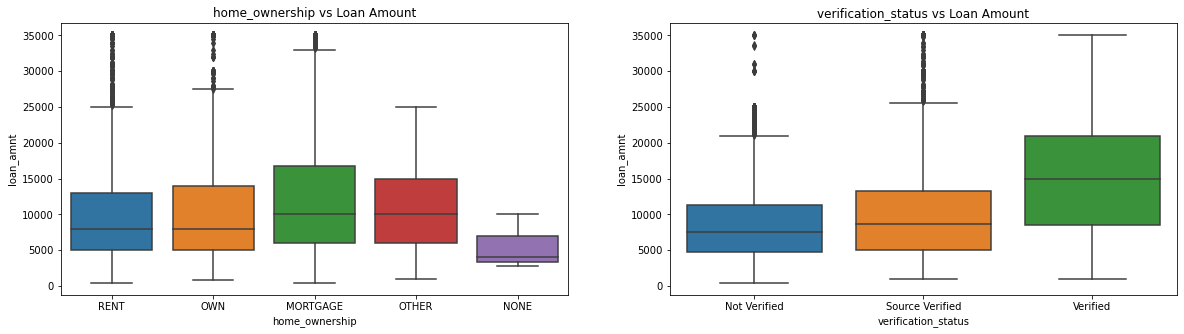

In [268]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_info.loan_amnt, data=loan_info)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_info.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_info.loan_amnt, order = verification_status_ord, data=loan_info)

Above graphs clearly says that larger amounts given on Mortage and own house, Rented. 
similarly who all are verified successfully lending club has givn larger amounts

Text(0.5, 1.0, 'loan_status vs Loan Amount')

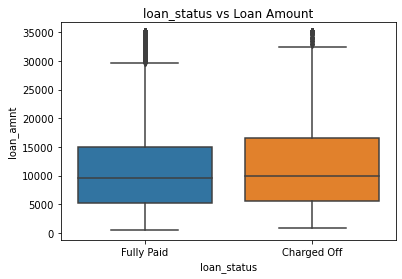

In [269]:
sns.boxplot(x='loan_status', y=loan_info.loan_amnt, data=loan_info)
plt.title('loan_status vs Loan Amount')

This quite interesting that loans with charged off are given with larger amounts

Text(0.5, 1.0, 'purpose vs Loan Amount')

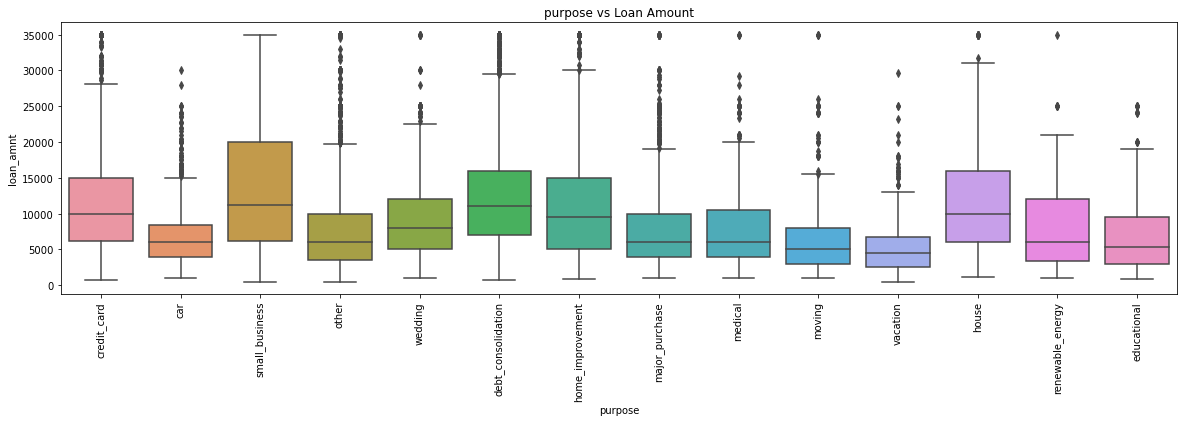

In [270]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_info.loan_amnt, data=loan_info)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

larger amounts of loans given on purpose of small business, house and debt consolidation purposes

Text(0.5, 1.0, 'emp_length vs Loan Amount')

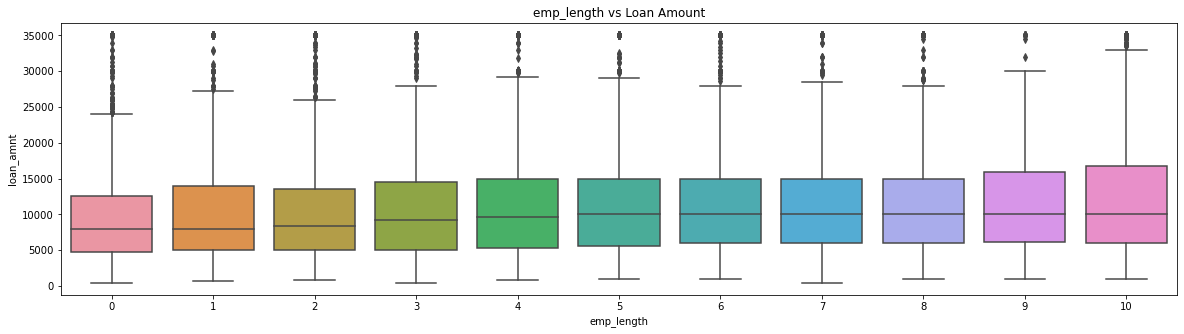

In [271]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_info.loan_amnt, data=loan_info)
plt.title('emp_length vs Loan Amount')

This clearly says that less emperienced people got less amounts compared to higher experienced perople

Text(0.5, 1.0, 'loan_status vs int_rate')

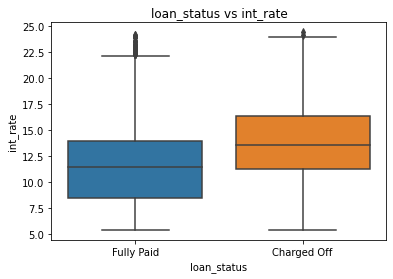

In [272]:
sns.boxplot(x='loan_status', y=loan_info.int_rate, data=loan_info)
plt.title('loan_status vs int_rate')

This is more useful information, this says that who are taken loans with more interest rates they likely to default

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

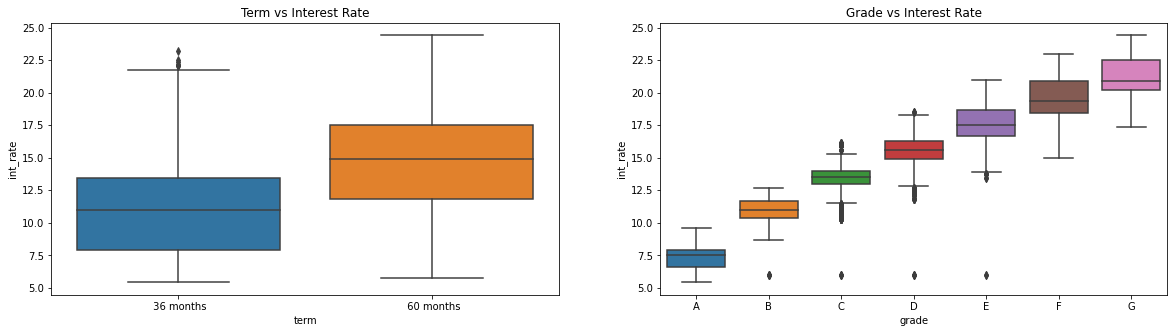

In [273]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_info.int_rate, data=loan_info)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_info.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_info.int_rate, order = grade_ord, data=loan_info)

This is usesfull information that more interest charged on long terms loans, 
At the same time the loans given with more interest rates are likely to defaulted

<AxesSubplot:title={'center':'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

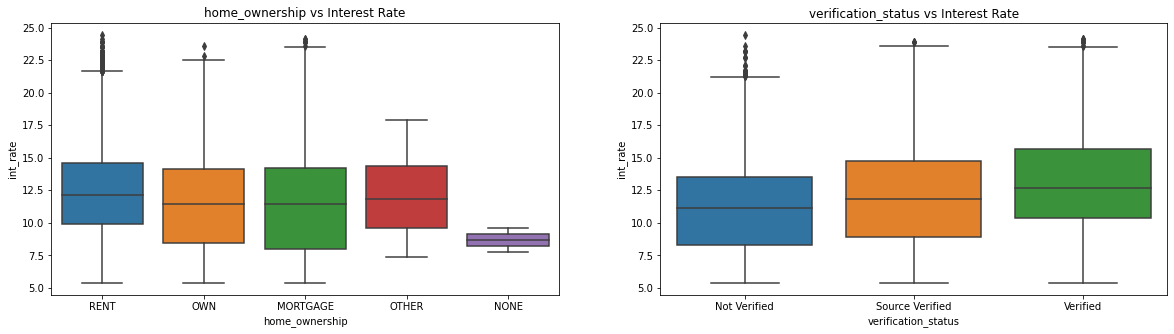

In [274]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_info.int_rate, data=loan_info)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan_info.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_info.int_rate, order = verification_status_ord, data=loan_info)

1. Loans are given with more interest rate for who are with Rented homes, 
this can again lead to default loans since all we know loans sanctioned with more interest rates are defaulted 

2. one more important point here is that applicants who all done with verifications are got charged with more interest.
And Not verified applicants got less interest rates

Text(0.5, 1.0, 'purpose vs Interest Rate')

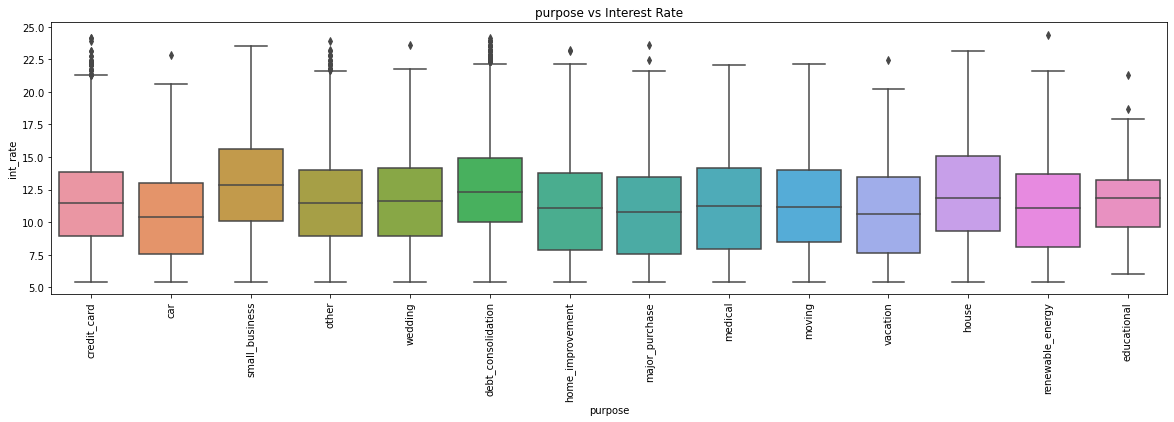

In [275]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_info.int_rate, data=loan_info)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

Again same here for small business applications apporoved loans with high interest rates

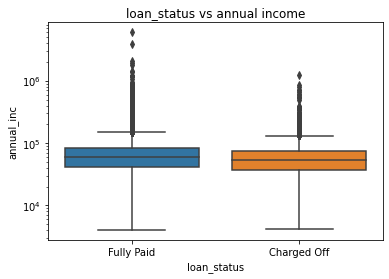

In [276]:
sns.boxplot(x='loan_status', y=loan_info.annual_inc, data=loan_info)
plt.title('loan_status vs annual income')
plt.yscale('log')

This is important note that charged off loan applicants getting less income than fully paid applicants

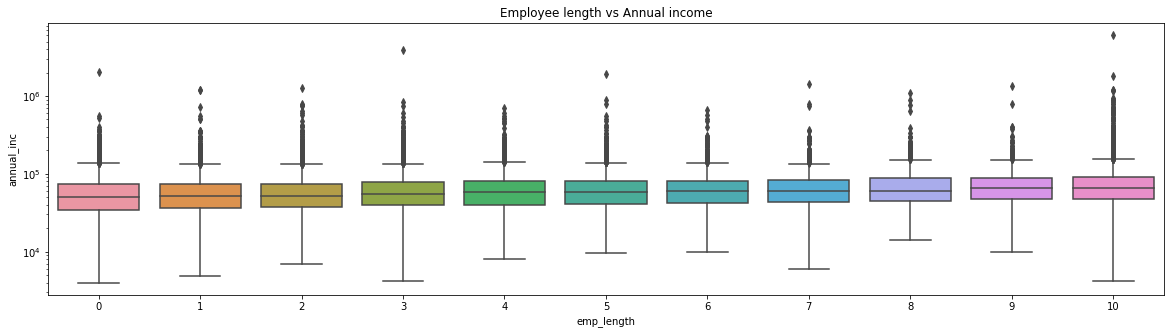

In [277]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_info.annual_inc, data=loan_info)
plt.title('Employee length vs Annual income')
plt.yscale('log')

higher experinced people getting more income as in general

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

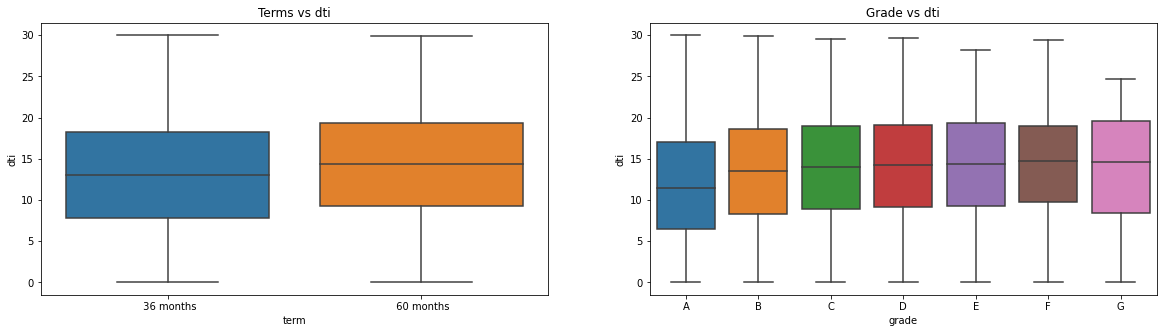

In [278]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_info.dti, data=loan_info)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan_info.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_info.dti, order = grade_ord, data=loan_info)

Its clearly says that debt to income ratio is more for loans which taken for more terms.
Dti is good indicator for lending to club to sanction loan or not

Dti is more for lower grade loan applicants

<AxesSubplot:title={'center':'verification_status vs dti'}, xlabel='verification_status', ylabel='dti'>

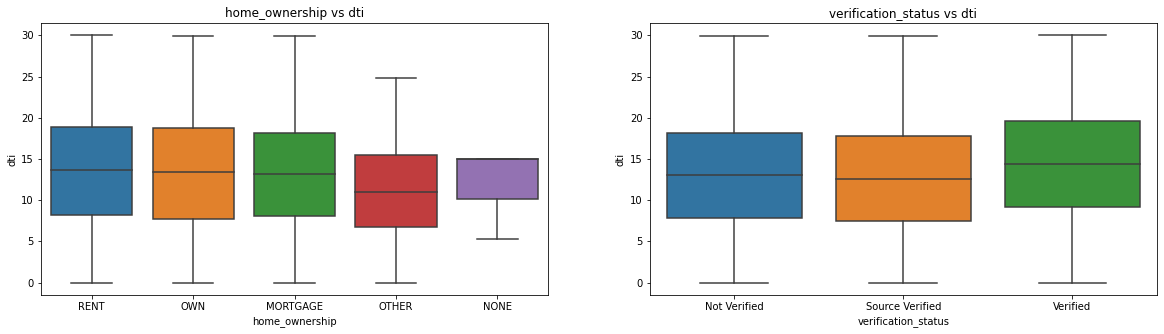

In [279]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_info.dti, data=loan_info)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = loan_info.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_info.dti, order = verification_status_ord, data=loan_info)

Dti is more for who has rented hose, Dti is less for who has own house 
Using these terms we can conclude that financial stability is more for own house people

Text(0.5, 1.0, 'loan_status vs dti')

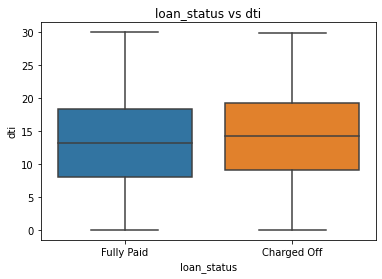

In [280]:
sns.boxplot(x='loan_status', y=loan_info.dti, data=loan_info)
plt.title('loan_status vs dti')

As expected high Debt to income ratio loans more likely to be defaulted

Text(0.5, 1.0, 'purpose vs dti')

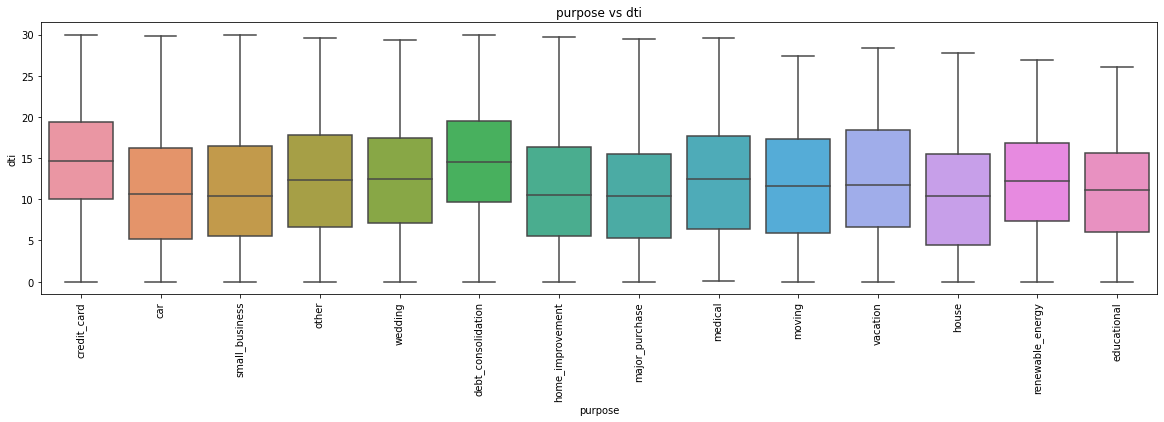

In [281]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_info.dti, data=loan_info)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

This is new interest thing to be noted that credit card and debt consolidation loans are having high Dti values

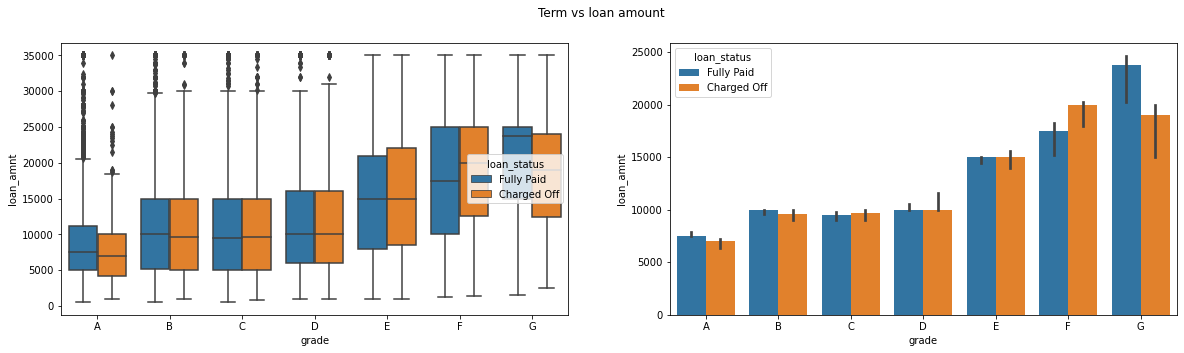

In [282]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_info, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_info, estimator=num.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

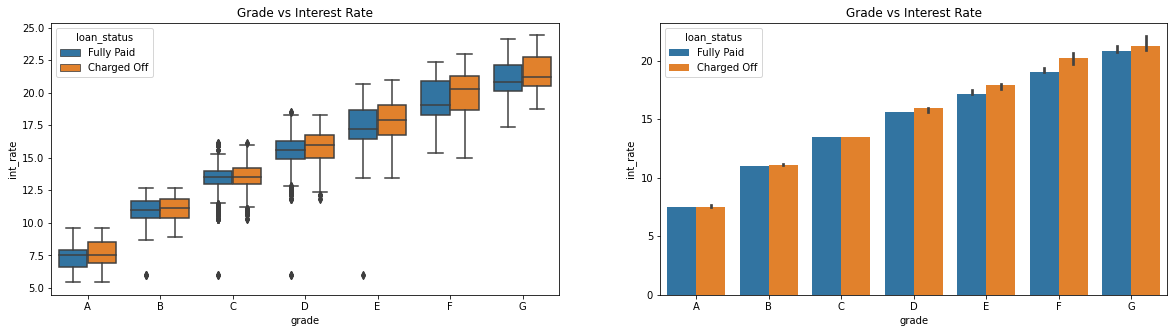

In [283]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_info, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_info, order = grade_ord, estimator=num.median)
plt.title('Grade vs Interest Rate')
plt.show()

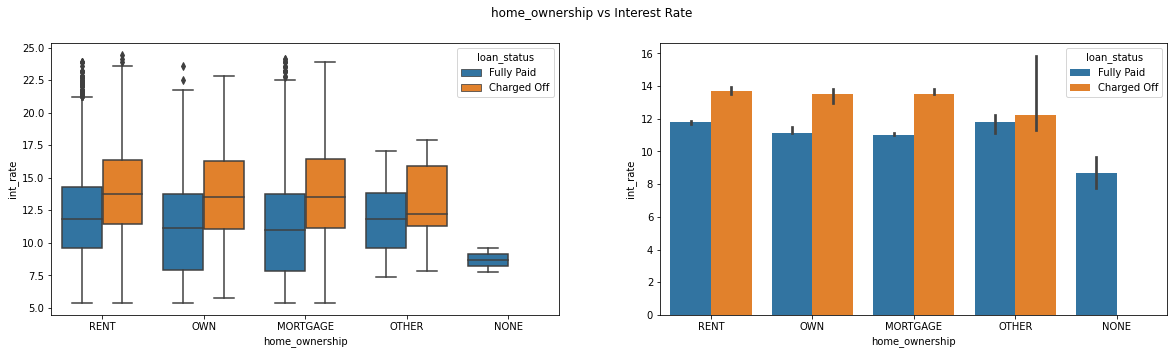

In [284]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_info)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_info, estimator=num.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

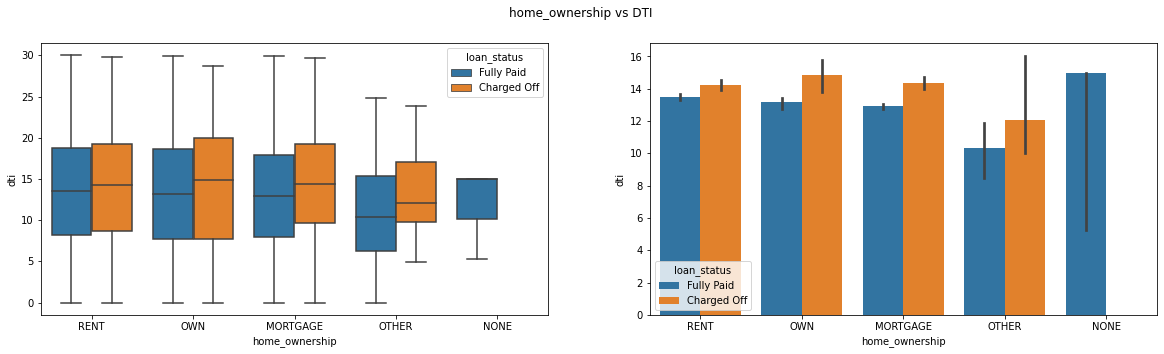

In [285]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan_info)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_info, estimator=num.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

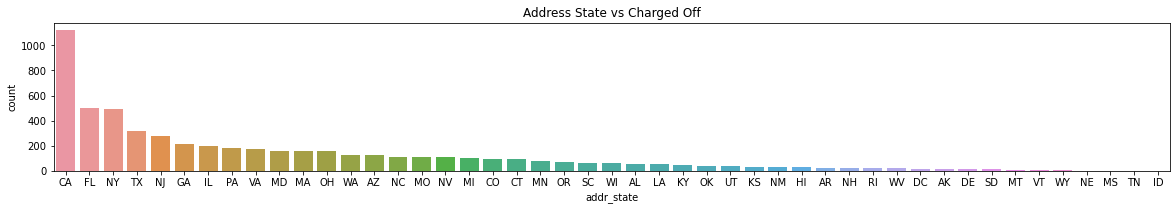

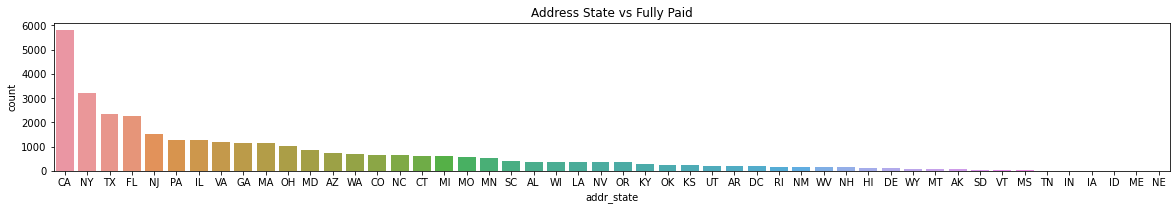

In [286]:
charged_off_df = loan_info[loan_info.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = loan_info[loan_info.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

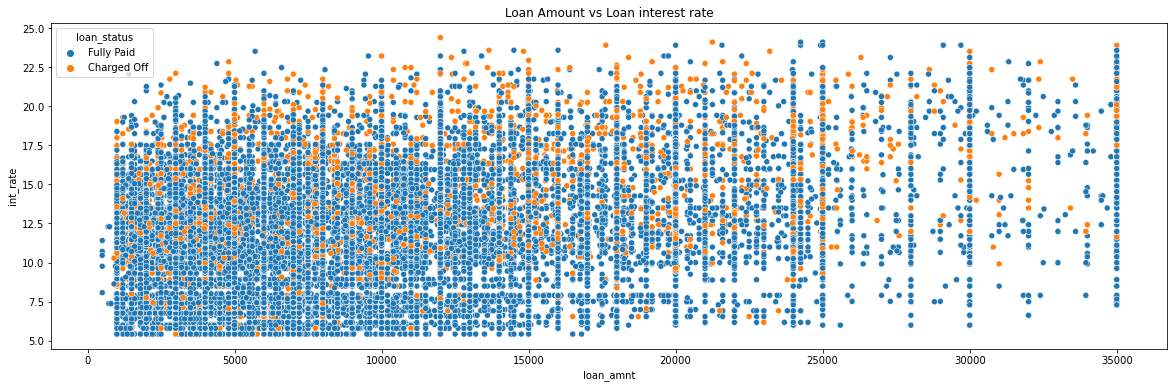

In [287]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_info, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

This scatter plot shows that there more loans defaulted when ROI is more

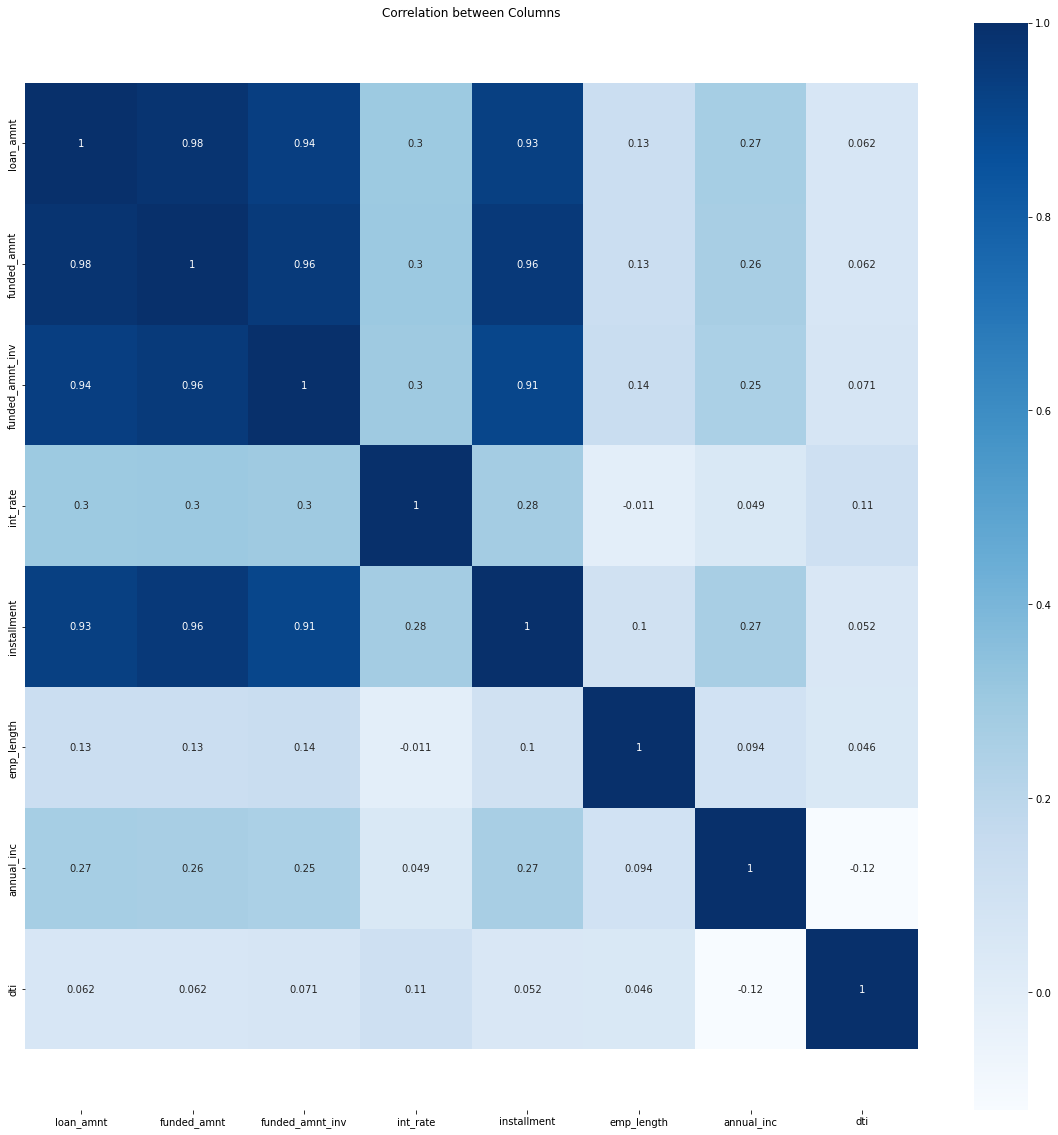

In [288]:
#Finding correlation matric
corr_matrix = loan_info.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

In [289]:
From this correlation matrics, we can see that loan amount, funded amount, funded invested amount are more correlated


SyntaxError: invalid syntax (1467308397.py, line 1)

# #Recommendations to Lending club

1. if Debt to income ratio is more, there are more possibilities to default the loan
2. Proper scrunity is required when loans are giving for high rate of interest, 
   since observed more defaulters when ROI is high
3. Loan taken for purpose of credit card consolition or debt consolidation having more defaults
4. Observed more defaults under rented house applicants compared to own house.
5. Loan taken as larger amount with 60 terms having more defaults
6. Low grade having more defaults, its good that lending club taking consideration on this.